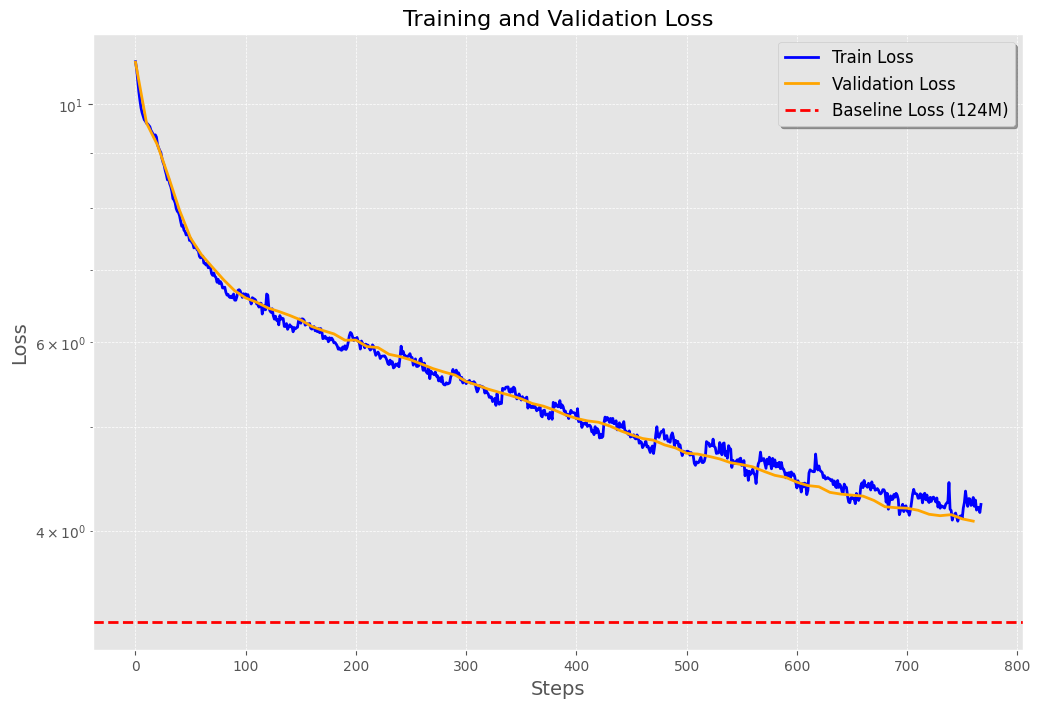

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Define the baseline loss for the original ChatGPT model
sz = "124M"
loss_baseline = {
    "124M": 3.2924,
}

# Initialize lists to store the steps and losses
train_steps = []
train_losses = []
val_steps = []
val_losses = []

# Read the log file and extract the data
with open('log/log.txt', 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 3:
            step, mode, loss = int(parts[0]), parts[1], float(parts[2])
            if mode == 'train':
                train_steps.append(step)
                train_losses.append(loss)
            elif mode == 'val':
                val_steps.append(step)
                val_losses.append(loss)

# Set a style for the plot
plt.style.use('ggplot')

# Create the plot with a larger figure size
plt.figure(figsize=(12, 8))

# Plot training loss with a thicker line
plt.plot(train_steps, train_losses, label='Train Loss', color='blue', linewidth=2)
#plt.fill_between(train_steps, train_losses, color='blue', alpha=0.2)  # Fill area under the training loss curve

# Plot validation loss with a thicker line
plt.plot(val_steps, val_losses, label='Validation Loss', color='orange', linewidth=2)

# Plot the baseline loss with a dashed line
if sz in loss_baseline:
    plt.axhline(y=loss_baseline[sz], color='red', linestyle='--', linewidth=2, label=f'Baseline Loss ({sz})')

# Add labels and title with larger font sizes
plt.xlabel('Steps', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.yscale('log')
plt.title('Training and Validation Loss', fontsize=16)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Improve the legend
plt.legend(loc='upper right', fontsize=12, frameon=True, shadow=True)

# Show the plot
plt.show()
